# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

state = np.random.RandomState(12345)

budget = 10*10**9
unit_revenue = 450*10**3
research_units = 500
best_units = 200

Номер региона: 1
99990
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
not numeric type id


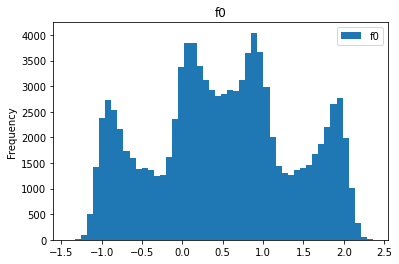

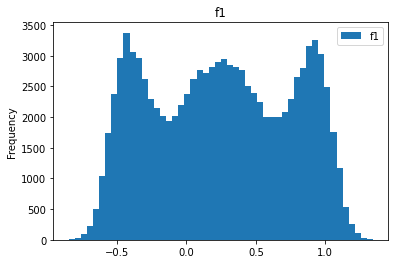

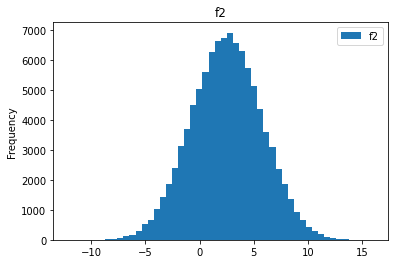

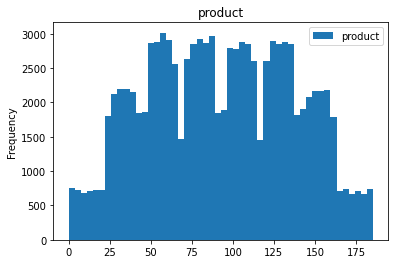


Номер региона: 2
99996
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
not numeric type id


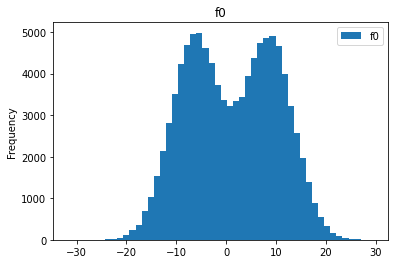

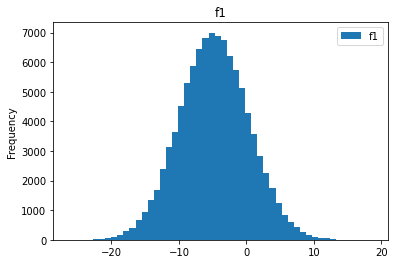

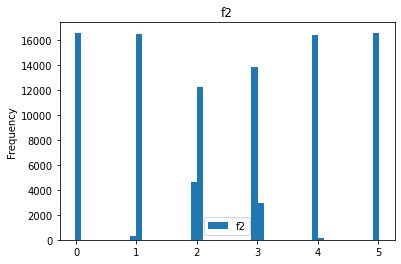

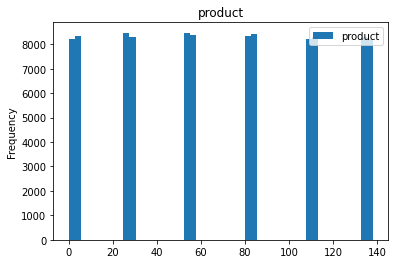


Номер региона: 3
99996
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
not numeric type id


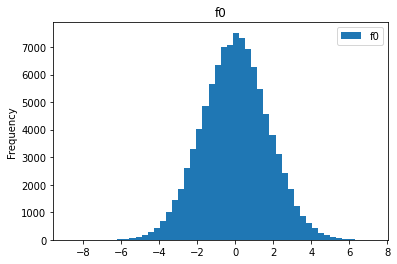

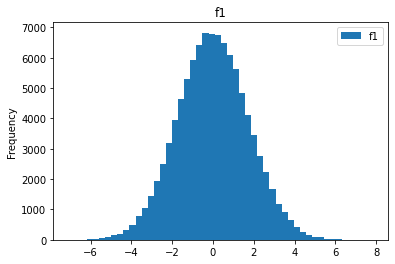

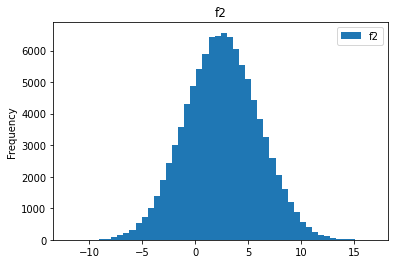

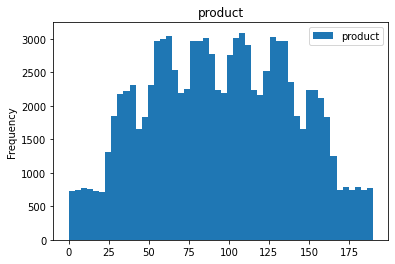

In [2]:
df1 = pd.read_csv("/datasets/geo_data_0.csv")
df2 = pd.read_csv("/datasets/geo_data_1.csv")
df3 = pd.read_csv("/datasets/geo_data_2.csv")


count = 1
for data in [df1, df2, df3]:
    print("Номер региона:",count)
    print(data['id'].nunique()) #есть неуникальные ID
    print(data.duplicated().sum()) #но в строках дублирования нет
    data.info() #значения без пропусков, красота
    data.describe()
    
    for i in data:
        try:
            data.plot(y = i,title = i,kind = 'hist', bins = 50)
            plt.show()
        except:
            print('not numeric type',i)
    
    count += 1
    print("")

Качество данных хорошее: дублирования нет, нет пропусков, понятные форматы.
Распределения данных не вызывают вопросов.

In [3]:
features1 = df1.drop(['id','product'],axis = 1)
target1 = df1['product']
features_valid1, features_train1, target_valid1, target_train1 = train_test_split(features1, target1, test_size = 0.75, random_state = state)

features2 = df2.drop(['id','product'],axis = 1)
target2 = df2['product']
features_valid2, features_train2, target_valid2, target_train2 = train_test_split(features2, target2, test_size = 0.75, random_state = state)

features3 = df3.drop(['id','product'],axis = 1)
target3 = df3['product']
features_valid3, features_train3, target_valid3, target_train3 = train_test_split(features3, target3, test_size = 0.75, random_state = state)

## Обучение и проверка модели

Обучим и проверим модель для каждого региона

In [4]:
model = LinearRegression()#Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые)
model.fit(features_train1,target_train1)
predictions_valid = model.predict(features_valid1)
mse = mean_squared_error(target_valid1, predictions_valid)
rmse = mse ** 0.5

print("rmse:",round(rmse))
print("predictions_all_mean",round(model.predict(features1).mean()))
print("predictions_valid_mean",round(predictions_valid.mean()))
print("real_mean",round(df1['product'].mean()))

print("predictions_all_max",round(model.predict(features1).max()))
print("real_mean",round(df1['product'].max()))

rmse: 38
predictions_all_mean 92
predictions_valid_mean 93
real_mean 93
predictions_all_max 195
real_mean 185


In [5]:
model2 = LinearRegression()#Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые)
model2.fit(features_train2,target_train2)
predictions_valid = model2.predict(features_valid2)
mse = mean_squared_error(target_valid2, predictions_valid)
rmse = mse ** 0.5

print("rmse:",round(rmse))
print("predictions_all_mean",round(model2.predict(features2).mean()))
print("predictions_valid_mean",round(predictions_valid.mean()))
print("real_mean",round(df2['product'].mean()))

rmse: 1
predictions_all_mean 69
predictions_valid_mean 69
real_mean 69


In [6]:
model3 = LinearRegression()#Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые)
model3.fit(features_train3,target_train3)#Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые)
predictions_valid = model3.predict(features_valid3)
mse = mean_squared_error(target_valid3, predictions_valid)
rmse = mse ** 0.5

print("rmse:",round(rmse))
print("predictions_all_mean",round(model3.predict(features3).mean()))
print("predictions_valid_mean",round(predictions_valid.mean()))
print("real_mean",round(df3['product'].mean()))

rmse: 40
predictions_all_mean 95
predictions_valid_mean 95
real_mean 95


Предсказанные среднее очень близки к фактическим. 
Но смущает значение rmse для 1 и 3 регионов - оно составляет 41-46% от среднего зависимой переменной.

## Подготовка к расчёту прибыли

- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. 
- Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [7]:
break_even_point = budget/unit_revenue
print("Разработка в регионе окупится при добыче не менее баррелей:",round(break_even_point))

avg_barrel_point = break_even_point/best_units
print("Скважина должна приносить, в среднем, тыс боррелей:",round(avg_barrel_point))

Разработка в регионе окупится при добыче не менее баррелей: 22222
Скважина должна приносить, в среднем, тыс боррелей: 111


Чтобы разработка скважины в регионе окупилась, нужно добыть 22,2 млн баррелей.
Тк в результате всех исследований разрабатывают 200 скважин, то одна скважина должна приносить 111 тыс баррелей.
Среди наших  регионов все средние ниже целевого - придется искать глубже 

## Расчёт прибыли и рисков 

- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. 
- Среди них выбирают регион с наибольшей средней прибылью.

In [8]:
def revenue(target, predictions, count):
    pred_sorted = predictions.sort_values(ascending=False)
    selected = target[pred_sorted.index][:count]
    return selected.sum()*unit_revenue-budget

In [9]:
def evaluating (model,features,target_valid): 
    predictions = pd.Series(model.predict(features))
    values = []

    for i in range(1000): #Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
        target_subsample = target_valid.sample(n=research_units, replace=True, random_state=state)
        pred_subsample = predictions[target_subsample.index]
        values.append(revenue(target_subsample, pred_subsample, best_units))

    values = pd.Series(values)
    lower = values.quantile(0.025)# Найдите 95%-й доверительный интервал 
    upper = values.quantile(0.975)

    mean = values.mean()
    print("Средняя выручка,млн руб.:", round(mean/10**6,2))
    print("2.5%-квантиль:", round(lower/10**6,2))
    print("97.5%-квантиль:", round(upper/10**6,2))

    values_loss = [x for x in values if x < 0]
    risk = len(values_loss)/len(values)
    percentage_risk = "{:.0%}".format(risk)
    print("Риск убытков:", percentage_risk)


print("Region1:")
evaluating(model,features1,target_valid1) 
print("")
print("Region2:")
evaluating(model2,features2,target_valid2)
print("")
print("Region3:")
evaluating(model3,features3,target_valid3) 

Region1:
Средняя выручка,млн руб.: 472.71
2.5%-квантиль: -50.07
97.5%-квантиль: 996.16
Риск убытков: 4%

Region2:
Средняя выручка,млн руб.: 473.65
2.5%-квантиль: 55.36
97.5%-квантиль: 916.52
Риск убытков: 1%

Region3:
Средняя выручка,млн руб.: 406.93
2.5%-квантиль: -121.21
97.5%-квантиль: 941.68
Риск убытков: 7%


## Вывод:
Наиболее привлекательный регион для разработки - второй. В нем минимальные риски выйти в убыток и наиболе высокие ожидания по объемам добычи и,как следствие, прибыли, если принять гипотезу, что операционные издержки во всех трех регионах одинаковые.
Также качество работы модели на данных второго региона выше: rmse = 1 при средних значениях датасета - 65, что говорит о более точных предсказаниях.